In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')
#What is warnings filterwarnings ignore?
#The warnings module is a built-in Python library that allows you to control the display of warning messages. To turn off warning messages, you can use the warnings. filterwarnings() function

In [9]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])

NameError: name 'x' is not defined

In [13]:
x = df[df['Outcome']==1]['BMI']
y= df[df['Outcome']==0]['BMI']

(array([[  2.,   0.,   0.,  16.,  99.,  97.,  41.,  10.,   2.,   1.],
        [  9.,   0.,  15., 140., 169., 127.,  37.,   2.,   1.,   0.]]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 2 BarContainer objects>)

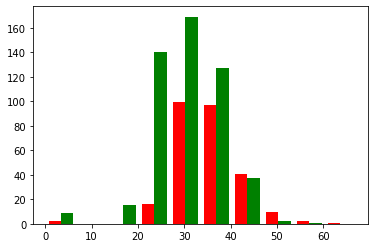

In [14]:
plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])

In [15]:
x = df[df['Outcome']==1]['Glucose']
y= df[df['Outcome']==0]['Glucose']

(array([[  2.,   0.,   0.,   1.,  13.,  54.,  63.,  51.,  45.,  39.],
        [  3.,   0.,   4.,  31., 143., 157., 100.,  44.,  11.,   7.]]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 2 BarContainer objects>)

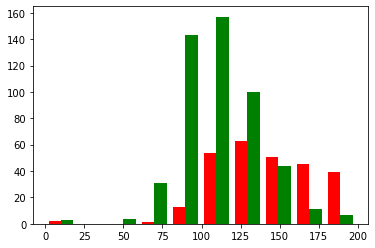

In [16]:
plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])

In [17]:
X = df.drop('Outcome',axis = 1)
y1 = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [19]:
from sklearn.preprocessing import scale
X = scale(X)
#perform feature scaling on the data in the DataFrame X. Feature scaling is a common preprocessing step in machine learning that standardizes or normalizes the features so that they have similar scales. 


X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
#the algorithm will consider the labels of the 7 nearest data points when making predictions.
 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [32]:
print("Confusion matrix: ")
cs = metrics.confusion_matrix(y_test,y_pred)
print(cs)

Confusion matrix: 
[[123  28]
 [ 37  43]]


In [33]:
print("Acccuracy ",metrics.accuracy_score(y_test,y_pred))

Acccuracy  0.7186147186147186


In [34]:
total_misclassified = cs[0,1] + cs[1,0]
print(total_misclassified)
total_examples = cs[0,0]+cs[0,1]+cs[1,0]+cs[1,1]
print(total_examples)
print("Error rate",total_misclassified/total_examples)
print("Error rate ",1-metrics.accuracy_score(y_test,y_pred))

65
231
Error rate 0.2813852813852814
Error rate  0.2813852813852814


In [35]:
print("Precision score",metrics.precision_score(y_test,y_pred))

Precision score 0.6056338028169014


In [36]:
print("Recall score ",metrics.recall_score(y_test,y_pred))

Recall score  0.5375


In [37]:
print("Classification report ",metrics.classification_report(y_test,y_pred))

Classification report                precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.54      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231

